# Midterm Project

<ul>
<li>Alexandra Peza</li>
<li>Dimitra Paranou</li>
<li>Maria Mamai</li>
</ul>

## Problem 1

In [1]:
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt

### Task 1

In [2]:
#define the model
def polynomial(x, params):
    k = params[0] + params[1]*pow(x, 1) + params[2]*pow(x, 2) + params[3]*pow(x, 3) + params[4]*pow(x, 5)
    return k
    

In [3]:
#training parameters, number of samples, 20 equidistance points in [0,2]
theta = [0.2, -1, 0.9, 0.7, - 0.2]
samples = 20
x = np.linspace(0, 2, samples)

In [4]:
#calculate the training set
y =  polynomial(x, theta)
# 0 is the mean of the normal distribution you are choosing from
# 0.1 is the standard deviation of the normal distribution
# 1 is the number of elements you get in array noise
y = y + np.random.normal(0,np.sqrt(0.1),20) #add white Gaussian noise

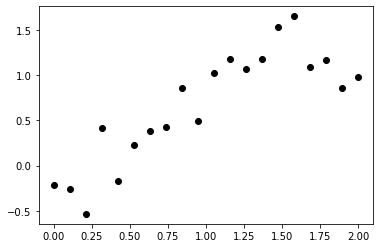

In [5]:
#plot results
plt.plot(x, y, "ko", label="Data")

In [6]:
# create the matrices for least square method
X = []
Y = []
for i in range(0,5):
    X.append([sum(pow(x,i)), sum(pow(x,i+1)), sum(pow(x,i+2)), sum(pow(x,i+3)), sum(pow(x,i+5))])
    Y.append([sum(pow(x,i)*y)])

In [7]:
#find the optimal parameters
opt_coef = np.dot(np.linalg.inv(X), Y)

In [8]:
opt_coef

array([[-2.67754788e-01],
       [ 5.52141882e-02],
       [ 1.96308269e+00],
       [-8.59334986e-01],
       [ 6.10112411e-04]])

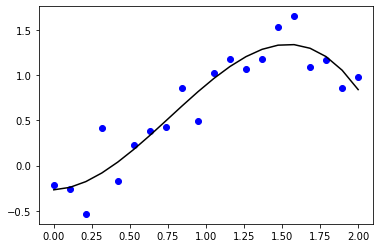

In [9]:
#plot our results based on the optimal parameters
y_pred = polynomial(x, opt_coef)
plt.plot(x, y, 'bo')
plt.plot(x, polynomial(x, opt_coef), 'k-')
plt.show() 

In [10]:
# Calculate Mean Square Error of y over the training set
mse = (1/samples) * sum(pow(y - y_pred, 2))
print(mse)

0.04296227056057509


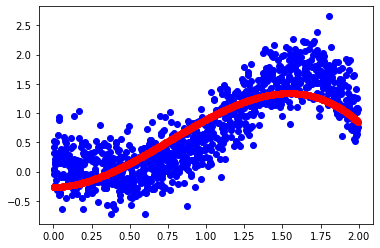

In [11]:
#create the test set based on the optimal parameters
x_test = np.random.uniform(0, 2, size=(1000) )
#x_test = np.linspace(0, 2, 1000)
y_test_true = polynomial(x_test, theta)
y_test_true = y_test_true + np.random.normal(0,np.sqrt(0.1),1000)
y_test_pred = polynomial(x_test, opt_coef)

plt.plot(x_test, y_test_true, 'bo')
plt.plot(x_test, y_test_pred,'ro')
plt.show()

In [12]:
# calculate the mean square error over the test set of 1000 points
mse_test = (1/1000) * sum(pow(y_test_true - y_test_pred, 2))
print(mse_test)

0.16627523027499921


Noticing the MSE of the training set we deduct that the optimal parameters of the Least Square Method fits our data properly

### Task 2

#### Second Degree Polynomial

In [13]:
#define the second degree polynomial 
def second_degree_pol_f(x, params):
    k = params[0] + params[1]*x + params[2]*x**2
    return k

In [14]:
# create the matrices
X2 = []
Y2 = []
for i in range(0,3):
    X2.append([sum(pow(x,i)), sum(pow(x,i+1)), sum(pow(x,i+2))])
    Y2.append([sum(pow(x,i)*y)])

In [15]:
#calculate optimal parameters
popt2 = np.matmul(np.linalg.inv(X2), Y2)

print(popt2)

[[-0.55725454]
 [ 2.05471402]
 [-0.60595528]]


[]

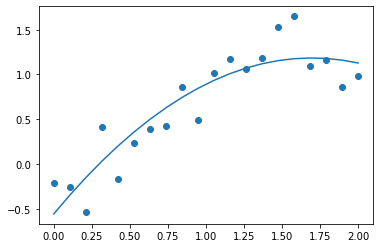

In [16]:
#plot our results
plt.scatter(x, y)
plt.plot(x, second_degree_pol_f(x, popt2))
plt.plot()

In [17]:
#perform 100 exeriments using different noise samples
results_second_polynomial = []
for i in range(0, 100):
    y = second_degree_pol_f(x, popt2) + np.random.normal(0,np.sqrt(0.1), 20)
    results_second_polynomial.append(y)
    

In [18]:
df2 = pd.DataFrame(results_second_polynomial)

In [19]:
# calculate the mean value of each column
mean_second_degree = []

# calculate the variance value of each column
variance_second_degree = []

for (columnName, columnData) in df2.iteritems():
    mean = sum(columnData)/100
    mean_second_degree.append(mean)
    variance_second_degree.append(sum(pow(columnData - mean, 2))/100)
    

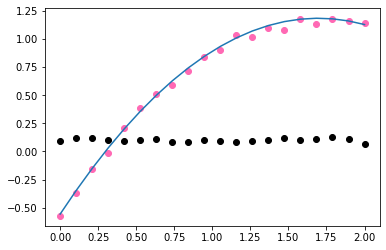

In [20]:
plt.scatter(x, mean_second_degree, color = 'hotpink')
plt.scatter(x, variance_second_degree, color = 'black')
plt.plot(x, second_degree_pol_f(x, popt2))
plt.show()

#### Tenth Degree Polynomial

In [21]:
#defining the 10th degree polynomial
def tenth_degree_pol_f(x, params):
    k = params[0] + params[1]*x + params[2]*x**2 + params[3]*x**3 + params[4]*x**4 + params[5]*x**5 + params[6]*x**6 + params[7]*x**7 + params[8]*x**8 + params[9]*x**9 + params[10]*x**10
    return k

In [22]:
# create the matrices
X10 = []
Y10 = []
for i in range(0,11):
    X10.append([sum(pow(x,i)), sum(pow(x,i+1)), sum(pow(x,i+2)), sum(pow(x,i+3)), sum(pow(x,i+4)), sum(pow(x,i+5)), sum(pow(x,i+6)), sum(pow(x,i+7)), sum(pow(x,i+8)), sum(pow(x,i+9)), sum(pow(x,i+10))])
    Y10.append([sum(pow(x,i)*y)])

In [23]:
#get the optimal parameters
popt10 = np.matmul(np.linalg.inv(X10), Y10)

print(popt10)

[[-8.55242033e-01]
 [-1.03300600e+01]
 [ 1.63191921e+02]
 [-7.56795593e+02]
 [ 1.89851189e+03]
 [-3.01693683e+03]
 [ 3.20903635e+03]
 [-2.27371233e+03]
 [ 1.02037935e+03]
 [-2.59914476e+02]
 [ 2.84240329e+01]]


[]

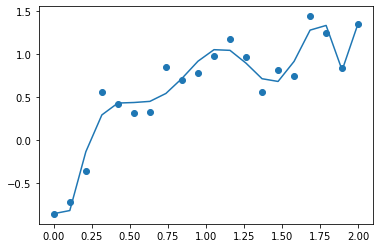

In [24]:
plt.scatter(x, y)
plt.plot(x, tenth_degree_pol_f(x, popt10))
plt.plot()

In [25]:
#perform 100 experiments using different noise samples
results_tenth_polynomial = []
for i in range(0, 100):
    k = tenth_degree_pol_f(x, popt10) + np.random.normal(0,np.sqrt(0.1), 20)
    results_tenth_polynomial.append(k)
    

In [26]:
df10 = pd.DataFrame(results_tenth_polynomial)

In [27]:
# calculate the mean value of each column
mean_tenth_degree = []
# calculate the variance value of each column
variance_tenth_degree = []

for (columnName, columnData) in df10.iteritems():
    mean = sum(columnData)/100
    mean_tenth_degree.append(mean)
    variance_tenth_degree.append(sum(pow(x - mean, 2))/100)

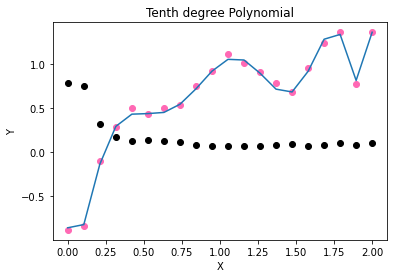

In [28]:
plt.scatter(x, mean_tenth_degree, color = 'hotpink')
plt.scatter(x, variance_tenth_degree, color = 'black')
plt.plot(x, tenth_degree_pol_f(x, popt10))
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Tenth degree Polynomial")
plt.show()

 Comparing our results between the 2nd and the 10th degree polynomial we observe that we have higher variance in the later. This was expected, because having a high degree polynomial overfits our data (lower bias). In contrast, the second degree polynomial has smaller variance and thus higher bias. This is known as the bias - variance dilemma, where smaller degree polynomials do not fit the data properly(underfit), having higher mean square error, whereas higher degree polynomials overfit our data and make them less flexible with the general data.

### Task 3

In [29]:
#create x matrix with the corresponding powers
x_matrix = []

for i in x:
    x_matrix.append([1, i, pow(i,2), pow(i,3), pow(i,5)])

x_matrix = np.array(x_matrix)

In [30]:
#Set the different values of alpha to be tested
lamda = [1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 3, 5, 7, 10, 15]

In [31]:
#apply ridge regression method 
opt_coef_ridge = []
for l in lamda:
    xtx = np.matmul(np.matrix.transpose(x_matrix), x_matrix)
    aI = l* np.identity(5)
    a_term = np.add(xtx, aI)
    b_term = np.matmul(np.matrix.transpose(x_matrix), y)
    opt_coef_ridge.append(np.matmul(np.linalg.inv(a_term), b_term))

In [32]:
#calculate MSE for each lambda 
mse_ridge = []
for coef in opt_coef_ridge:
    y_test_ridge = polynomial(x, coef) + np.random.normal(0,np.sqrt(0.1), 20)
    error = (1/20) * sum(pow(y - y_test_ridge, 2))
    mse_ridge.append(error)
    

we observe that for lambda values smaller than 1, we get smaller mse, so better results. As we increase the lambda, the MSE is increased respectively. We can also observe this, from the following plot

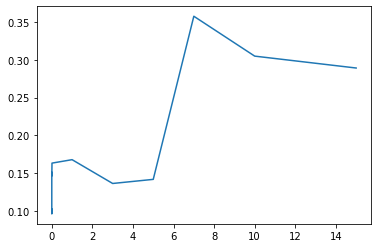

In [33]:
# small lambda -> ~1
plt.plot(lamda, mse_ridge)

### Task 4

In [34]:
#Bayes Rule
# P(θ|x) = P(x|θ)*P(θ) / P(x)

In [35]:
# generate 20 random samples for Bayesian Inference 
x_random_bayes = np.random.uniform(0, 2, size=(samples))
x_random_bayes_matrix = []

for i in x_random_bayes:
  x_random_bayes_matrix.append([1, i, pow(i,2), pow(i,3), pow(i,5)])

x_random_bayes_matrix = np.array(x_random_bayes_matrix)

In [36]:
# calculate Bayesian Inference for the 20 samples based on our prior knowledge -> coefficients from LS 
sn2 = [0.05, 0.15] # it's square
sth2 = 0.1

y_pred_bayes = [] # prediction of each y
var_bayes = [] # variance of each y

for sn in sn2:
    s_theta_y = np.linalg.inv(((1/sth2)*np.identity(5) + (1/sn)*np.matmul(np.transpose(x_matrix),x_matrix)))
    a_param = 1/sn*s_theta_y
    b_param = np.matmul(a_param, np.transpose(x_matrix))
    c_param = np.matmul(x_matrix, opt_coef)
    d_param = np.reshape(y, (20,1)) - c_param
    e_param = np.matmul(b_param, d_param)
    m_theta_y = np.add(opt_coef, e_param)

    arr_bayes = []
    arr_var_bayes = []
    for idx, row in enumerate(x_random_bayes_matrix):
        m_y = np.matmul(row, m_theta_y)
        arr_bayes.append(m_y[0])

        s_theta_y_var = np.linalg.inv((sn*np.identity(5) + sth2*np.matmul(np.transpose(x_matrix),x_matrix)))
        f_param = sn*sth2*row
        g_param = np.matmul(f_param, s_theta_y_var)
        h_param = np.matmul(g_param, np.transpose(row))
        s_y = sn + h_param
        arr_var_bayes.append(s_y)

    y_pred_bayes.append(arr_bayes)
    var_bayes.append(arr_var_bayes)



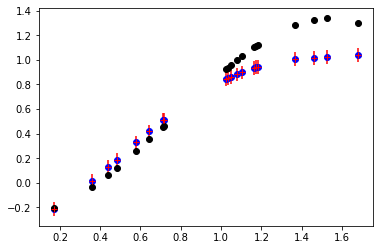

In [37]:
# for sn=0.05
plt.plot(x_random_bayes, y_pred_bayes[0], 'bo')
plt.plot(x_random_bayes, polynomial(x_random_bayes, opt_coef), 'ko')
plt.errorbar(x_random_bayes, y_pred_bayes[0], yerr=var_bayes[0], fmt='r+')
plt.show()


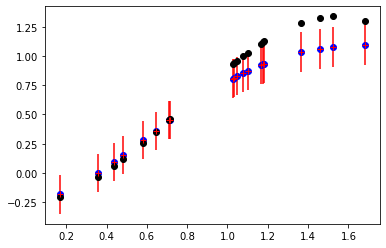

In [38]:
# for sn=0.15
plt.plot(x_random_bayes, y_pred_bayes[1], 'bo')
plt.plot(x_random_bayes, polynomial(x_random_bayes, opt_coef), 'ko')
plt.errorbar(x_random_bayes, y_pred_bayes[1], yerr=var_bayes[1], fmt='r+')
plt.show()

#### Observing the plots above, we can understand that as higher as the variance of noise is, we have bigger uncertainty - error. So, we prefer a smaller variance of noise.

### Task 5

In [39]:
# declare our new parameters
new_theta = [-10.54, 0.465, 0.0087, -0.093, -0.004]
new_theta = np.reshape(new_theta, (1,5))
new_theta = np.transpose(new_theta)

sth2_new = [0.1, 2]

In [40]:
# Calculate Bayesian Inference for 20 samples base on our previous knowledge
y_pred_bayes_20 = []
var_bayes_20 = []

for sth in sth2_new :
    s_theta_y = np.linalg.inv(((1/sth)*np.identity(5) + (1/sn2[0])*np.matmul(np.transpose(x_matrix),x_matrix)))
    a_param = 1/sn2[0]*s_theta_y
    b_param = np.matmul(a_param, np.transpose(x_matrix))
    c_param = np.matmul(x_matrix, new_theta)
    d_param = np.reshape(y, (20,1)) - c_param
    e_param = np.matmul(b_param, d_param)
    m_theta_y = np.add(new_theta, e_param)

    arr_bayes =[]
    arr_var_bayes =[]
    # for 20
    for idx, row in enumerate(x_random_bayes_matrix):
        m_y = np.matmul(row, m_theta_y)
        arr_bayes.append(m_y[0])

        s_theta_y_var = np.linalg.inv((sn2[0]*np.identity(5) + sth*np.matmul(np.transpose(x_matrix),x_matrix)))
        f_param = sn2[0]*sth*row
        g_param = np.matmul(f_param, s_theta_y_var)
        h_param = np.matmul(g_param, np.transpose(row))
        s_y = sn2[0] + h_param
        arr_var_bayes.append(s_y)


    y_pred_bayes_20.append(arr_bayes)    
    var_bayes_20.append(arr_var_bayes)


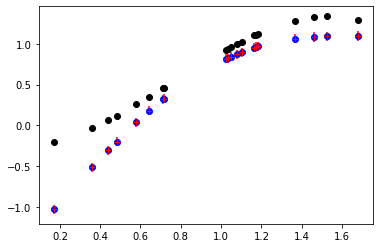

In [41]:
# for sth=0.1
plt.plot(x_random_bayes, y_pred_bayes_20[0], 'bo')
plt.plot(x_random_bayes, polynomial(x_random_bayes, opt_coef), 'ko')
plt.errorbar(x_random_bayes, y_pred_bayes_20[0], yerr=var_bayes_20[0], fmt='r+')
plt.show()

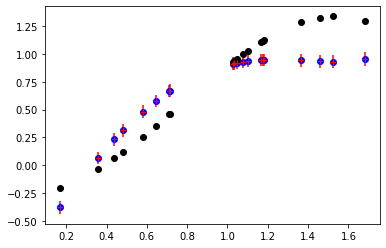

In [42]:
# for sn=2
plt.plot(x_random_bayes, y_pred_bayes_20[1], 'bo')
plt.plot(x_random_bayes, polynomial(x_random_bayes, opt_coef), 'ko')
plt.errorbar(x_random_bayes, y_pred_bayes_20[1], yerr=var_bayes_20[1], fmt='r+')
plt.show()

#### For 500 samples

In [43]:
# repeat the process for 500 samples
x500 = np.linspace(0, 2, 500)
y_500 = polynomial(x500, opt_coef)

In [44]:
x_matrix_500 = []

for i in x500:
    x_matrix_500.append([1, i, pow(i,2), pow(i,3), pow(i,5)])

x_matrix_500 = np.array(x_matrix_500)

In [45]:
x_random_bayes_500 = np.random.uniform(0, 2, size=(500))
x_random_bayes_matrix_500 = []

for i in x_random_bayes_500:
  x_random_bayes_matrix_500.append([1, i, pow(i,2), pow(i,3), pow(i,5)])

x_random_bayes_matrix_500 = np.array(x_random_bayes_matrix_500)

In [46]:
y_pred_bayes_500 = []
var_bayes_500 = []

for sth in sth2_new :
    s_theta_y = np.linalg.inv(((1/sth)*np.identity(5) + (1/sn2[0])*np.matmul(np.transpose(x_matrix_500),x_matrix_500)))
    a_param = 1/sn2[0]*s_theta_y
    b_param = np.matmul(a_param, np.transpose(x_matrix_500))
    c_param = np.matmul(x_matrix_500, new_theta)
    d_param = np.reshape(y_500, (500,1)) - c_param
    e_param = np.matmul(b_param, d_param)
    m_theta_y = np.add(new_theta, e_param)

    arr_bayes =[]
    arr_var_bayes =[]
    # for 500
    for idx, row in enumerate(x_random_bayes_matrix):
        m_y = np.matmul(row, m_theta_y)
        arr_bayes.append(m_y[0])

        s_theta_y_var = np.linalg.inv((sn2[0]*np.identity(5) + sth*np.matmul(np.transpose(x_matrix),x_matrix)))
        f_param = sn2[0]*sth*row
        g_param = np.matmul(f_param, s_theta_y_var)
        h_param = np.matmul(g_param, np.transpose(row))
        s_y = sn2[0] + h_param
        arr_var_bayes.append(s_y)


    y_pred_bayes_500.append(arr_bayes)    
    var_bayes_500.append(arr_var_bayes)


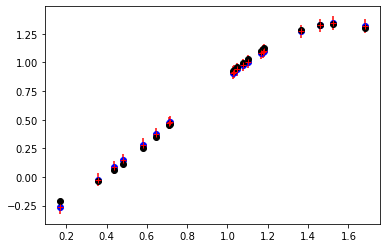

In [47]:
# for sth=0.1
plt.plot(x_random_bayes, y_pred_bayes_500[0], 'bo')
plt.plot(x_random_bayes, polynomial(x_random_bayes, opt_coef), 'ko')
plt.errorbar(x_random_bayes, y_pred_bayes_500[0], yerr=var_bayes_500[0], fmt='r+')
plt.show()

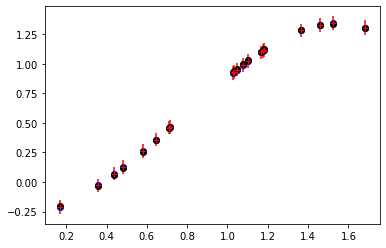

In [48]:
# for sth=2
plt.plot(x_random_bayes, y_pred_bayes_500[1], 'bo')
plt.plot(x_random_bayes, polynomial(x_random_bayes, opt_coef), 'ko')
plt.errorbar(x_random_bayes, y_pred_bayes_500[1], yerr=var_bayes_500[1], fmt='r+')
plt.show()

For bigger s_theta we noticed that the prediction is more accurate. This makes sense, because we don't restrict so much our theta around the mean value of theta_0.

At the same time, having a bigger sample, we can have our data fit better to our model. Better prediction.


### Task 6

In [49]:
# define params for Expectation Maximization method
exp_max_n = 500
a_em = 1 #s_theta_- 2
b_em = 1 #s_n_- 2
y_500_noise = y_500 + np.random.normal(0,np.sqrt(0.05),500) # new training set

In [50]:
# repeat Expectation Maximization method until b(j) and b(j+1) converge  
for i in range(0,50):
  s_theta_y = np.linalg.inv((a_em*np.identity(5) + b_em*np.matmul(np.transpose(x_matrix_500),x_matrix_500)))
  a_param = b_em*s_theta_y
  b_param = np.matmul(a_param, np.transpose(x_matrix_500))
  m_theta_y = np.matmul(b_param, y_500_noise)

  norm_A = pow(np.linalg.norm(m_theta_y), 2)
  A = np.add(norm_A, np.trace(s_theta_y))

  c_param = np.matmul(x_matrix_500, m_theta_y)
  d_param = np.subtract(y_500_noise, c_param)
  norm_B = pow(np.linalg.norm(d_param), 2)
  e_param = np.matmul(x_matrix_500, s_theta_y)
  f_param = np.matmul(e_param, np.transpose(x_matrix_500))
  B = np.add(norm_B, np.trace(f_param))

  K = 5 # number of dimension in coefficient
  Q = K/2*np.log(a_em) + 250*np.log(b_em) + (a_em/2)*A - (b_em/2)*B - ((250 + (K/2))*np.log(2*np.pi))
  
  
  a_new = K/A
  b_new = exp_max_n/B

  if(abs(b_em - b_new) < 0.0001) :
      break

  b_em = b_new 
  a_em = a_new 

In [51]:
# test our results in a new random sample, consisting of 20 random points in interval [0,2]
s_theta_y = np.linalg.inv((a_em*np.identity(5) + b_em*np.matmul(np.transpose(x_matrix_500),x_matrix_500)))
a_param = b_em*s_theta_y
b_param = np.matmul(a_param, np.transpose(x_matrix_500))
c_param = np.matmul(x_matrix_500, opt_coef)
d_param = np.reshape(y_500_noise, (500,1)) - c_param
e_param = np.matmul(b_param, d_param)
m_theta_y = np.add(opt_coef, e_param)

arr_bayes_em =[]
arr_var_bayes_em =[]
# for 500
for idx, row in enumerate(x_random_bayes_matrix):
    m_y = np.matmul(row, m_theta_y)
    arr_bayes_em.append(m_y[0])

    s_theta_y_var = np.linalg.inv(((1/b_em)*np.identity(5) + (1/a_em)*np.matmul(np.transpose(x_matrix),x_matrix)))
    f_param = (1/b_em)*(1/a_em)*row
    g_param = np.matmul(f_param, s_theta_y_var)
    h_param = np.matmul(g_param, np.transpose(row))
    s_y = sn2[0] + h_param
    arr_var_bayes_em.append(s_y)

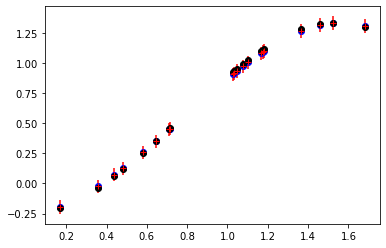

In [52]:
plt.plot(x_random_bayes, arr_bayes_em, 'bo')
plt.plot(x_random_bayes, polynomial(x_random_bayes, opt_coef), 'ko')
plt.errorbar(x_random_bayes, arr_bayes_em, yerr=arr_var_bayes_em, fmt='r+')
plt.show()

Observing our results, we notice that Expectation Maximization method managed to predict our initial model in 4 iterations. The outcome fits very well our test set and not with much error. 

## Problem 2

### Task 1

In [53]:
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
import math

In [54]:
def calculate_classification_knn(X_train, X_test, y_train, y_test):
  k_nn = [3,5,8,10,12,15,20, 30] # possible neighbors

  test_size = X_test.shape[0]
  
  for k in k_nn:
    success_categorization = 0
    for index1,plant in enumerate(X_test):
      distance_from_other_plants = []
      test_class = y_test.index[index1]
      category = {}

      for index2,train_plant in enumerate(X_train):
          train_class = y_train.index[index2]
          distance_from_other_plants.append([distance.euclidean(train_plant, plant), y_test[test_class], y_train[train_class]])
      
      sorted_dist = np.array(sorted(distance_from_other_plants, key=lambda x:x[0]))
      nearest_classes = sorted_dist[0:k,]

      # count the occurrence frequency of categories of the nearest neighbors
      for item in nearest_classes:
        if item[2] in category.keys():
          category[item[2]] += 1
        else :
          category[item[2]] = 1

      # check if the class with the highest frequency of occurrence is the true class of the plant
      if y_test[test_class] == max(category, key=category.get):
        success_categorization += 1

    print("For k neighbors: " + str(k))
    print("success class " + str((round(success_categorization/test_size, 2))*100) + "%")  

#### IRIS Results
We split our data in 60% train and 40% test data

* We also tried different percentages of data split (80% train - 20% test / 60% train - 40% test), where we noticed that in lower train dataset size the k_nn needs more neighbors to classify correctly the test set, whereas in higher dataset size (ex.80%) the k_nn classifies the train dataset correclty with fewer k_nn
* For 60%-40% we noticed that the optimal k is among 10-12, where lower or higher ks reduce the accuracy of the classification
* For 70%-30% we noticed that the optimal k is 3 or higher  
* For 80%-20% we noticed that the optimal k is 8 or higher  

In [55]:
# IRIS Dataset
iris_plants = pd.read_csv("iris.data", header=None, delimiter=",")
iris_plants_array = np.array(iris_plants)

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(iris_plants_array[:,0:4], iris_plants[4], test_size=0.4, random_state=0)

In [56]:
calculate_classification_knn(X_train_iris, X_test_iris, y_train_iris, y_test_iris)

For k neighbors: 3
success class 93.0%
For k neighbors: 5
success class 95.0%
For k neighbors: 8
success class 93.0%
For k neighbors: 10
success class 97.0%
For k neighbors: 12
success class 97.0%
For k neighbors: 15
success class 93.0%
For k neighbors: 20
success class 90.0%
For k neighbors: 30
success class 87.0%


#### PIMA Results
We split our data in 80% train and 20% test data

* We also tried different percentages of data split (70% train - 30% test / 60% train - 40% test), where we noticed that in lower train dataset size the k_nn doesn't achieve high accuracy with the test set, whereas in higher dataset size (ex.80%) the k_nn classifies the train dataset more accurelty
* For 60%-40% we noticed that the optimal k is among 8-10 or 15 (75%), where other ks reduce the accuracy of the classification
* For 70%-30% we noticed that the optimal k is 15 (75%)  
* For 80%-20% we noticed that the optimal k is 20 or higher (79% -> 81%)  

In [57]:
# PIMA INDIANS DIABETES Dataset
pima_indians_diabetes = pd.read_csv("pima-indians-diabetes.data", header=None, delimiter=",")
pima_indians_diabetes_array = np.array(pima_indians_diabetes)

In [58]:
X_train_pima, X_test_pima, y_train_pima, y_test_pima = train_test_split(pima_indians_diabetes_array[:,0:8], pima_indians_diabetes[8], test_size=0.2, random_state=0)

In [59]:
calculate_classification_knn(X_train_pima, X_test_pima, y_train_pima, y_test_pima)

For k neighbors: 3
success class 72.0%
For k neighbors: 5
success class 75.0%
For k neighbors: 8
success class 77.0%
For k neighbors: 10
success class 77.0%
For k neighbors: 12
success class 77.0%
For k neighbors: 15
success class 79.0%
For k neighbors: 20
success class 79.0%
For k neighbors: 30
success class 81.0%


### Task 2

In [60]:
#convert dataframe to arrays
zero_class = pima_indians_diabetes.loc[pima_indians_diabetes[8] == 0]
one_class = pima_indians_diabetes.loc[pima_indians_diabetes[8] == 1]
zero_class_array = np.array(zero_class[[0,1,2,3,4,5,6,7]])
one_class_array = np.array(one_class[[0,1,2,3,4,5,6,7]])

y_zero = np.empty(shape=(zero_class_array.shape[0],1))
y_zero.fill(0)

y_one= np.empty(shape=(one_class_array.shape[0],1))
y_one.fill(1)

In [61]:
def calculate_probability(covar, N, sample, mean_class):
  a_var = pow(2*math.pi,N*0.5)
  b_var = pow(np.linalg.det(covar),0.5)
  c_var = 1/(a_var*b_var)
  d_var = np.transpose(sample-mean_class)
  e_var = np.matmul(d_var, np.linalg.inv(covar))
  f_var = np.matmul(e_var, (sample-mean_class))
  g_var = -0.5*f_var
  h_var = math.exp(g_var)
  prob = c_var * h_var
  return prob

In [62]:
# BIC -> -2*log*L(θ) + k*log(n)
def BIC(likelihood, k, n):
  bic_result = -2*likelihood + k*np.log10(n)
  return bic_result

In [63]:
# AIC -> -2*log*L(θ) + 2*k
def AIC(likelihood, k):
  aic_result = -2*likelihood + 2*k
  return aic_result

##### a)Pdfs are gaussian. The covariance matrices are diagonal, with all diagonal elements equal.

In [64]:
def calculate_mean_variance_diagonal(matrix):
  mean = matrix.mean(axis=0)

  variance = np.zeros(8)

  for item in matrix:
    variance += np.power(item- mean, 2)
  
  # divide each class variance with the N
  variance = variance/matrix.shape[0]
  
  return variance, mean


In [65]:
variance_pima_one, mean_pima_one = calculate_mean_variance_diagonal(one_class_array)
variance_pima_zero, mean_pima_zero = calculate_mean_variance_diagonal(zero_class_array)

covariance_matrices_diagonal_one = variance_pima_one.mean()*np.identity(8)
covariance_matrices_diagonal_zero = variance_pima_zero.mean()*np.identity(8)

In [66]:
probability_zero = np.empty(shape=(zero_class_array.shape[0],1))
for index, i in enumerate(zero_class_array):
  probability_zero[index] = calculate_probability(covariance_matrices_diagonal_zero, zero_class_array.shape[0], i, mean_pima_zero)

In [67]:
probability_one = np.empty(shape=(one_class_array.shape[0],1))
for index, i in enumerate(one_class_array):
  probability_one[index] = calculate_probability(covariance_matrices_diagonal_one, one_class_array.shape[0], i, mean_pima_one)

In [68]:
# Finding the logarithm of the probabilities 
L_zero=np.log(probability_zero)
L_one=np.log(probability_one)

# Sum the logarithms
sum_L_zero = L_zero.sum()
sum_L_one = L_one.sum()

In [69]:
# 9 parameters = 8 variance + 1 mean
bic_zero = BIC(sum_L_zero,9,zero_class_array.shape[0])
aic_zero = AIC(sum_L_zero,9)
print("BIC: " + str(bic_zero))
print("AIC: " + str(aic_zero))

BIC: 492466.08412098506
AIC: 492459.79339094606


In [70]:
# 9 parameters = 8 variance + 1 mean
bic_one = BIC(sum_L_one,9,one_class_array.shape[0])
aic_one = AIC(sum_L_one,9)
print("BIC: " + str(bic_one))
print("AIC: " + str(aic_one))

BIC: 151062.86902886262
AIC: 151059.01581571635


##### b)Pdfs are gaussian, with non-diagonal covariance matrices

In [71]:
def calculate_mean_covariance(matrix):
  mean = matrix.mean(axis=0)

  matrix_sub_mean = []
  for item in matrix:
    #substract mean from each sample of the dataset
    matrix_sub_mean.append(item-mean)
  
  covariance = np.matmul(np.transpose(matrix_sub_mean), matrix_sub_mean)
  
  # divide each class variance with the N
  covariance = covariance/matrix.shape[0]
  
  return covariance, mean


In [72]:
covariance_pima_one_nondiagonal, mean_pima_one_nondiagonal = calculate_mean_covariance(one_class_array)
covariance_pima_zero_nondiagonal, mean_pima_zero_nondiagonal = calculate_mean_covariance(zero_class_array)

In [73]:
probability_zero_nondiagonal = np.empty(shape=(zero_class_array.shape[0],1))
for index, i in enumerate(zero_class_array):
  probability_zero_nondiagonal[index] = calculate_probability(covariance_pima_zero_nondiagonal, zero_class_array.shape[0], i, mean_pima_zero_nondiagonal)

In [74]:
probability_one_nondiagonal = np.empty(shape=(one_class_array.shape[0],1))
for index, i in enumerate(one_class_array):
  probability_one_nondiagonal[index] = calculate_probability(covariance_pima_one_nondiagonal, one_class_array.shape[0], i, mean_pima_one_nondiagonal)

In [75]:
# Finding the logarithm of the probabilities 
L_zero_nondiagonal=np.log(probability_zero_nondiagonal)
L_one_nondiagonal=np.log(probability_one_nondiagonal)

# Sum the logarithms
sum_L_zero_nondiagonal = L_zero_nondiagonal.sum()
sum_L_one_nondiagonal = L_one_nondiagonal.sum()

In [76]:
# 44 parameters = symmetric covariance
bic_zero_nondiagonal = BIC(sum_L_zero_nondiagonal,44,zero_class_array.shape[0])
aic_zero_nondiagonal = AIC(sum_L_zero_nondiagonal,44)
print("BIC: " + str(bic_zero_nondiagonal))
print("AIC: " + str(aic_zero_nondiagonal))

BIC: 480725.3363321486
AIC: 480694.5816519578


In [77]:
# 44 parameters = symmetric covariance
bic_one_nondiagonal = BIC(sum_L_one_nondiagonal,44,one_class_array.shape[0])
aic_one_nondiagonal = AIC(sum_L_one_nondiagonal,44)
print("BIC: " + str(bic_one_nondiagonal))
print("AIC: " + str(aic_one_nondiagonal))

BIC: 144193.97580919563
AIC: 144175.13787825836


##### c)Naïve Bayes

In [78]:
def calculate_probability_Naive_Bayes(mean, variance, matrix):
  a_var = 1/(np.sqrt(variance)*2*math.pi)

  matrix_sub_mean = []
  for sample in matrix:
    matrix_sub_mean.append(np.power(sample-mean, 2))
  
  matrix_sub_mean = np.array(matrix_sub_mean) 
  b_var = np.divide(matrix_sub_mean,variance)
  c_var = -0.5*b_var
  d_var = np.exp(c_var)
  prob = np.matmul(d_var, a_var)
  
  return prob

In [79]:
naive_prob_zero = calculate_probability_Naive_Bayes(mean_pima_zero, variance_pima_zero, zero_class_array)
naive_prob_one = calculate_probability_Naive_Bayes(mean_pima_one, variance_pima_one, one_class_array)

# Multiplication of probabilities
total_prob_naive_zero = np.log(np.prod(naive_prob_zero))
total_prob_naive_one = np.log(np.prod(naive_prob_one))

In [80]:
# 16 parameters = 8 variance + 8 means
bic_zero_naive = BIC(total_prob_naive_zero,16,zero_class_array.shape[0])
aic_zero_naive = AIC(total_prob_naive_zero,16)
print("BIC: " + str(bic_zero_naive))
print("AIC: " + str(aic_zero_naive))

BIC: 821.3225287301675
AIC: 810.1390086607912


In [81]:
# 16 parameters = 8 variance + 8 means
bic_one_naive = BIC(total_prob_naive_one,16,one_class_array.shape[0])
aic_one_naive = AIC(total_prob_naive_one,16)
print("BIC: " + str(bic_one_naive))
print("AIC: " + str(aic_one_naive))

BIC: 573.6009397638085
AIC: 566.7507830593479


##### d)Naïve Bayes - 1-d Parzen windows

In [82]:
def windows_function(xi, mean, h):
  a_var = (1/np.sqrt(2*math.pi))
  b_var = np.exp((-(xi-mean)**2)/(2*h**2))

  return a_var*b_var

In [83]:
def probability_parzen(matrix, mean):
  h = np.sqrt(matrix.shape[0])

  sum_of_windows_function = []
  for sample in matrix:
    sum_of_windows_function.append(windows_function(sample, mean, h))

  sum_of_windows_function = np.array(sum_of_windows_function)
  probabilities = sum_of_windows_function.sum(axis=1) / matrix.shape[1]

  return probabilities


In [84]:
probability_parzen_zero = probability_parzen(zero_class_array, mean_pima_zero)
probability_parzen_one = probability_parzen(one_class_array, mean_pima_one)

In [85]:
total_probability_parzen_zero = np.log(np.prod(probability_parzen_zero))
total_probability_parzen_one = np.log(np.prod(probability_parzen_one))

In [86]:
# 1 parameter = h
bic_one_parzen = BIC(total_probability_parzen_one,1,one_class_array.shape[0])
aic_one_parzen = AIC(total_probability_parzen_one,1)
print("BIC: " + str(bic_one_parzen))
print("AIC: " + str(aic_one_parzen))

BIC: 689.6393157640899
AIC: 689.2111809700612


In [87]:
# 1 parameter = h
bic_zero_parzen = BIC(total_probability_parzen_zero,1,zero_class_array.shape[0])
aic_zero_parzen = AIC(total_probability_parzen_zero,1)
print("BIC: " + str(bic_zero_parzen))
print("AIC: " + str(aic_zero_parzen))

BIC: 1152.4334299043644
AIC: 1151.7344599000285


From the above results, we can conclude that in case a) and b) we have significant high resutls in AIC and BIC estimators, in contrast with the c) and d) that we get lower results. The best method from all the above is the Naive Bayes where we have the minimum penalty.

### Task 3

#### a) Diagonal covariance matrices

In [88]:
def count_misclassifications(probability_class_true, probability_class_false):
  misclassify_counter = 0

  for index,prob in enumerate(probability_class_true):
    if prob < probability_class_false[index]:
      misclassify_counter += 1
  
  return misclassify_counter

In [89]:
# split train dataset to zero and one class
x_train_pima_zero = []
x_train_pima_one = []
y_train_pima_zero = []
y_train_pima_one = []

for index, sample in enumerate(X_train_pima):
  train_class_index = y_train_pima.index[index]
  train_class = y_train_pima[train_class_index]
  
  if train_class == 0 :
    x_train_pima_zero.append(sample)
  else :
    x_train_pima_one.append(sample)

x_train_pima_zero = np.array(x_train_pima_zero)
x_train_pima_one = np.array(x_train_pima_one)

In [90]:
variance_pima_one_diagonal_bayes, mean_pima_one_diagonal_bayes = calculate_mean_variance_diagonal(x_train_pima_one)
variance_pima_zero_diagonal_bayes, mean_pima_zero_diagonal_bayes = calculate_mean_variance_diagonal(x_train_pima_zero)

covariance_matrices_bayes_diagonal_one = variance_pima_one_diagonal_bayes.mean()*np.identity(8)
covariance_matrices_bayes_diagonal_zero = variance_pima_zero_diagonal_bayes.mean()*np.identity(8)


In [91]:
probability_zero_belong_zero_bayes_diagonal = np.empty(shape=(x_train_pima_zero.shape[0],1))
probability_zero_belong_one_bayes_diagonal = np.empty(shape=(x_train_pima_zero.shape[0],1))
for index, i in enumerate(x_train_pima_zero):
  probability_zero_belong_zero_bayes_diagonal[index] = calculate_probability(covariance_matrices_bayes_diagonal_zero, x_train_pima_zero.shape[0], i, mean_pima_zero_diagonal_bayes)
  probability_zero_belong_one_bayes_diagonal[index] = calculate_probability(covariance_matrices_bayes_diagonal_one, x_train_pima_zero.shape[0], i, mean_pima_one_diagonal_bayes)

In [92]:
probability_one_belong_zero_bayes_diagonal= np.empty(shape=(x_train_pima_one.shape[0],1))
probability_one_belong_one_bayes_diagonal= np.empty(shape=(x_train_pima_one.shape[0],1))
for index, i in enumerate(x_train_pima_one):
  probability_one_belong_zero_bayes_diagonal[index] = calculate_probability(covariance_matrices_bayes_diagonal_zero, x_train_pima_one.shape[0], i, mean_pima_zero_diagonal_bayes)
  probability_one_belong_one_bayes_diagonal[index] = calculate_probability(covariance_matrices_bayes_diagonal_one, x_train_pima_one.shape[0], i, mean_pima_one_diagonal_bayes)

In [93]:
misclassify_result_zero_bayes_classsification_diagonal = count_misclassifications(probability_zero_belong_zero_bayes_diagonal, probability_zero_belong_one_bayes_diagonal)
misclassify_result_one_bayes_classsification_diagonal = count_misclassifications(probability_one_belong_one_bayes_diagonal,probability_one_belong_zero_bayes_diagonal)

In [94]:
print("Missclassify " + str(misclassify_result_zero_bayes_classsification_diagonal) + " zero class samples from " + str(x_train_pima_zero.shape[0]))
print("Accuracy for zero class: " + str(round(100-(misclassify_result_zero_bayes_classsification_diagonal/x_train_pima_zero.shape[0])*100,2)) + "%")
print("Missclassify " + str(misclassify_result_one_bayes_classsification_diagonal) + " one class samples from " + str(x_train_pima_one.shape[0]))
print("Accuracy for one class: " + str(round(100-(misclassify_result_one_bayes_classsification_diagonal/x_train_pima_one.shape[0])*100,2)) + "%")

Missclassify 56 zero class samples from 393
Accuracy for zero class: 85.75%
Missclassify 157 one class samples from 221
Accuracy for one class: 28.96%


#### b) Non-Diagonal covariance matrices

In [95]:
covariance_pima_one_non_diagonal_bayes, mean_pima_one_non_diagonal_bayes = calculate_mean_covariance(x_train_pima_one)
covariance_pima_zero_non_diagonal_bayes, mean_pima_zero_non_diagonal_bayes = calculate_mean_covariance(x_train_pima_zero)

In [96]:
probability_zero_belong_zero_bayes_non_diagonal = np.empty(shape=(x_train_pima_zero.shape[0],1))
probability_zero_belong_one_bayes_non_diagonal = np.empty(shape=(x_train_pima_zero.shape[0],1))
for index, i in enumerate(x_train_pima_zero):
  probability_zero_belong_zero_bayes_non_diagonal[index] = calculate_probability(covariance_pima_zero_non_diagonal_bayes, x_train_pima_zero.shape[0], i, mean_pima_zero_non_diagonal_bayes)
  probability_zero_belong_one_bayes_non_diagonal[index] = calculate_probability(covariance_pima_one_non_diagonal_bayes, x_train_pima_zero.shape[0], i, mean_pima_one_non_diagonal_bayes)

In [97]:
probability_one_belong_zero_bayes_non_diagonal= np.empty(shape=(x_train_pima_one.shape[0],1))
probability_one_belong_one_bayes_non_diagonal= np.empty(shape=(x_train_pima_one.shape[0],1))
for index, i in enumerate(x_train_pima_one):
  probability_one_belong_zero_bayes_non_diagonal[index] = calculate_probability(covariance_pima_zero_non_diagonal_bayes, x_train_pima_one.shape[0], i, mean_pima_zero_non_diagonal_bayes)
  probability_one_belong_one_bayes_non_diagonal[index] = calculate_probability(covariance_pima_one_non_diagonal_bayes, x_train_pima_one.shape[0], i, mean_pima_one_non_diagonal_bayes)

In [98]:
misclassify_result_zero_bayes_classsification_non_diagonal = count_misclassifications(probability_zero_belong_zero_bayes_non_diagonal, probability_zero_belong_one_bayes_non_diagonal)
misclassify_result_one_bayes_classsification_non_diagonal = count_misclassifications(probability_one_belong_one_bayes_non_diagonal,probability_one_belong_zero_bayes_non_diagonal)

In [99]:
print("Missclassify " + str(misclassify_result_zero_bayes_classsification_non_diagonal) + " zero class samples from " + str(x_train_pima_zero.shape[0]))
print("Accuracy for zero class: " + str(round(100-(misclassify_result_zero_bayes_classsification_non_diagonal/x_train_pima_zero.shape[0])*100,2)) + "%")
print("Missclassify " + str(misclassify_result_one_bayes_classsification_non_diagonal) + " one class samples from " + str(x_train_pima_one.shape[0]))
print("Accuracy for one class: " + str(round(100-(misclassify_result_one_bayes_classsification_non_diagonal/x_train_pima_one.shape[0])*100,2)) + "%")

Missclassify 81 zero class samples from 393
Accuracy for zero class: 79.39%
Missclassify 74 one class samples from 221
Accuracy for one class: 66.52%


#### c) Naive Bayes

In [100]:
naive_prob_zero_belong_zero_cross_val = calculate_probability_Naive_Bayes(mean_pima_zero_diagonal_bayes, variance_pima_zero_diagonal_bayes, x_train_pima_zero)
naive_prob_zero_belong_one_cross_val = calculate_probability_Naive_Bayes(mean_pima_one_diagonal_bayes, variance_pima_one_diagonal_bayes, x_train_pima_zero)
naive_prob_one_belong_zero_cross_val = calculate_probability_Naive_Bayes(mean_pima_zero_diagonal_bayes, mean_pima_zero_diagonal_bayes, x_train_pima_one)
naive_prob_one_belong_one_cross_val = calculate_probability_Naive_Bayes(mean_pima_one_diagonal_bayes, variance_pima_one_diagonal_bayes, x_train_pima_one)

In [101]:
misclassify_result_zero_naive_bayes = count_misclassifications(naive_prob_zero_belong_zero_cross_val, naive_prob_zero_belong_one_cross_val)
misclassify_result_one_naive_bayes = count_misclassifications(naive_prob_one_belong_one_cross_val,naive_prob_one_belong_zero_cross_val)

In [102]:
print("Missclassify " + str(misclassify_result_zero_naive_bayes) + " zero class samples from " + str(x_train_pima_zero.shape[0]))
print("Accuracy for zero class: " + str(round(100-(misclassify_result_zero_naive_bayes/x_train_pima_zero.shape[0])*100,2)) + "%")
print("Missclassify " + str(misclassify_result_one_naive_bayes) + " one class samples from " + str(x_train_pima_one.shape[0]))
print("Accuracy for one class: " + str(round(100-(misclassify_result_one_naive_bayes/x_train_pima_one.shape[0])*100,2)) + "%")

Missclassify 64 zero class samples from 393
Accuracy for zero class: 83.72%
Missclassify 27 one class samples from 221
Accuracy for one class: 87.78%


Observing the results of Naive Bayes classifier, we can see that it classifies our data better and this is because Naive Bayes assume that every sample is mutually independent. As a result, it achieves better accuracy compared to the Bayes classifier on the same dataset size. Bayes classifier depends on the dataset sample.

#### d)Naïve Bayes - 1-d Parzen windows

In [103]:
probability_parzen_zero_belongs_zero = probability_parzen(x_train_pima_zero, mean_pima_zero_diagonal_bayes)
probability_parzen_zero_belongs_one = probability_parzen(x_train_pima_zero, mean_pima_one_diagonal_bayes)
probability_parzen_one_belongs_zero = probability_parzen(x_train_pima_one, mean_pima_zero_diagonal_bayes)
probability_parzen_one_belongs_one = probability_parzen(x_train_pima_one, mean_pima_one_diagonal_bayes)

In [104]:
misclassify_result_zero_parzen = count_misclassifications(probability_parzen_zero_belongs_zero, probability_parzen_zero_belongs_one)
misclassify_result_one_parzen = count_misclassifications(probability_parzen_one_belongs_one,probability_parzen_one_belongs_zero)

In [105]:
print("Missclassify " + str(misclassify_result_zero_parzen) + " zero class samples from " + str(x_train_pima_zero.shape[0]))
print("Accuracy for zero class: " + str(round(100-(misclassify_result_zero_parzen/x_train_pima_zero.shape[0])*100,2)) + "%")
print("Missclassify " + str(misclassify_result_one_parzen) + " one class samples from " + str(x_train_pima_one.shape[0]))
print("Accuracy for one class: " + str(round(100-(misclassify_result_one_parzen/x_train_pima_one.shape[0])*100,2)) + "%")

Missclassify 113 zero class samples from 393
Accuracy for zero class: 71.25%
Missclassify 75 one class samples from 221
Accuracy for one class: 66.06%


As we can observe from the results of 3.a. and 3.b. , where we use Bayes classifier, the accuracy of our model is not so successive and more specifically in the second case (samples that belong to category one) because the size of the dataset is smaller. Naive Bayes achieves good results in both cases.

Now, Naive bayes is general much faster than KNN, as in our case. This is due to the fact that Naive bayes is parametric whereas KNN is non-parametric. From the results that we found, Naive Bayes can achieve better results given the same amount of time.

### Task 4

In [106]:
def perceptron(dataset, class_one):
  patterns = np.array(dataset[:,0:4])
  x0 = np.ones((dataset.shape[0],1))*(-1)
  patterns = np.hstack((patterns, x0))
  target = []

  # initialize the target dataset
  for sample in dataset:
    if sample[4] == class_one:
      target.append([1])
    else:
      target.append([-1])

  target = np.array(target)

  prod_t_x = patterns* target

  weights = [0,0,0,0,0]
  for k in range(500): # set the function to run for 5 epochs
    dw = []
    for index, i in enumerate(prod_t_x):
      twx = weights*i
      twx = twx.sum()

      if twx <= 0 :
        dw.append(i)
      else:
        dw.append(np.zeros(5))
      
      # update the weights
      weights = [a+b for a,b in zip(weights, dw[index])]
      weights = [round(num, 2) for num in weights]

    sum_dw_columns = sum(dw)
    sum_dw =  sum(sum_dw_columns)
    
    if sum_dw == 0.0: # if dw is zero, stop the excecution of epochs
      break
  
  return weights
  

In [107]:
params_setosa = perceptron(iris_plants_array, "Iris-setosa")
params_versicolor = perceptron(iris_plants_array, "Iris-versicolor")
params_virginica = perceptron(iris_plants_array, "Iris-virginica")

print(params_setosa)
print(params_versicolor)
print(params_virginica)

[1.3, 4.1, -5.2, -2.2, -1.0]
[63.9, -64.5, -3.5, -122.6, 73.0]
[-88.8, -80.7, 122.7, 185.0, 78.0]


In [108]:
def check_correct_perceptron(params, dataset):
  counter = 0
  for plant in dataset:
    prod = plant[0:4]*params[0:4] 
    result = prod.sum() + params[4]

    if result > 0:
      counter +=1

  return counter

In [109]:
result_setosa = check_correct_perceptron(params_setosa, iris_plants_array)
result_versicolor = check_correct_perceptron(params_versicolor, iris_plants_array)
result_virginica =  check_correct_perceptron(params_virginica, iris_plants_array)

print(result_setosa)
print(result_versicolor)
print(result_virginica)

50
140
98


From the above results and our trials, we noticed that the only dataset that is linearly separable from the remaining, is the Iris Setosa class. 

It is significant that the <b>Iris Setosa</b> needs only 4 epochs to achieve optimal parameters, whereas the other dataset cannot find optimal params that separate properly the classes. 

We can pinpoint that we run the perceptron algorithm for more than 10.000 epochs and the <b>Iris Versicolor</b> class cannot terminate.

In addition, the <b>Iris Virginica</b> manages to terminate in about 1.600, but it doesn't linearly separate the classes.